<a href="https://colab.research.google.com/github/payasvi/dl/blob/master/lab10/DL_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 10 - Transfer learning / Fine tuning / Use of bottleneck features
*Aim: Identify and download 3 types of images from imagenet and use a pretrained CNN model to classify it.* <br>
Pretrained models - https://keras.io/applications/ <br>
Submission : Word doc to be uploaded on drive should include: <br>
- Pretrained model summary
- Model hyper-parameters
- Mention image classes used
- confusion matrix array / plot
- Plot of history - loss vs epoch and accuracy vs epoch on train and validation set
- Train - validation - test split ratio
- best data augmentation settings
- Comment on which pretrained model is best

### Word Doc Stuff:
- Model Summary (After loading all models)
- Fine-tuning was throwing errors
- Image classes - Tiger cat, Snow Leopard, Liger
- Confusion matrix - plotted respective after summaries
- plot of history and data augmentation - not possible as compiling is not possible in pre-trained models
- Train-validation split ratio: 75%-25%
- VGG19 and VGG19 had best results

## Importing libraries

In [0]:
#code part 1
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
import os
import pandas as pd

## Web scraping

### Tiger Cat

In [0]:
#code part 1
tiger_cat_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02123159")#tiger cat synset
print(tiger_cat_page.content)

# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
tiger_cat_soup = BeautifulSoup(tiger_cat_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

#code part 2
tiger_cat_str_soup=str(tiger_cat_soup)#convert soup to string so it can be split
type(tiger_cat_str_soup)
tiger_cat_split_urls=tiger_cat_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(tiger_cat_split_urls))

b'http://farm2.static.flickr.com/1369/1162408779_6eb2d41a35.jpg\r\nhttp://static.flickr.com/1331/536306122_c45e305163.jpg\r\nhttp://farm3.static.flickr.com/2072/2088622613_2660469c6c.jpg\r\nhttp://farm2.static.flickr.com/1245/1259825348_6a2aa94e8d.jpg\r\nhttp://farm1.static.flickr.com/190/497844091_17ae70e427.jpg\r\nhttp://static.flickr.com/121/287178609_e2da31d419.jpg\r\nhttp://farm1.static.flickr.com/135/331620804_e315322a82.jpg\r\nhttp://farm1.static.flickr.com/120/260448163_03c2748acd.jpg\r\nhttp://farm1.static.flickr.com/118/287178612_7f68f9563b.jpg\r\nhttp://farm1.static.flickr.com/45/135579916_ce5bd90475.jpg\r\nhttp://farm1.static.flickr.com/88/262255460_0bb183a463.jpg\r\nhttp://farm1.static.flickr.com/52/129880739_47ef4d064c.jpg\r\nhttp://farm1.static.flickr.com/194/468615076_a2450bf20b.jpg\r\nhttp://static.flickr.com/1138/570147673_400fd3669a.jpg\r\nhttp://www.ualberta.ca/~dcarney/Pictures/Tigerlily1.jpg\r\nhttp://static.flickr.com/1077/807830062_43db2901c8.jpg\r\nhttp://stati

### Snow Leopard

In [0]:
#code part 1
snow_leopord_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02128757")#snow_leopord synset
print(snow_leopord_page.content)

# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
snow_leopord_soup = BeautifulSoup(snow_leopord_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

#code part 2
snow_leopord_str_soup=str(snow_leopord_soup)#convert soup to string so it can be split
type(snow_leopord_str_soup)
snow_leopord_split_urls=snow_leopord_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(snow_leopord_split_urls))

b'http://www.siegfriedandroy.com/animals/images/img_snow_leopard.jpg\r\nhttp://farm3.static.flickr.com/2416/2003405556_426be8aa12.jpg\r\nhttp://farm1.static.flickr.com/109/251030930_0bcc693896.jpg\r\nhttp://farm1.static.flickr.com/87/245179164_7563773396.jpg\r\nhttp://farm1.static.flickr.com/222/483515586_0f58a7e0db.jpg\r\nhttp://farm3.static.flickr.com/2119/1516054269_18033e4a15.jpg\r\nhttp://farm1.static.flickr.com/81/266554623_680b37b0ff.jpg\r\nhttp://farm3.static.flickr.com/2268/2166830653_1c162f9ba3.jpg\r\nhttp://farm2.static.flickr.com/1401/1413916808_2ba3f26a80.jpg\r\nhttp://static.flickr.com/215/504894128_2914e06841.jpg\r\nhttp://www.jandu.co.uk/images/snowleopard.jpg\r\nhttp://i23.photobucket.com/albums/b398/redbaranjj/tn_sl2.jpg\r\nhttp://www.cs.mcgill.ca/~navraj/SOUTH_AFRICA/images/Snow_leopard_joburg_zoo.jpg\r\nhttp://farm1.static.flickr.com/84/256742827_b24c24c130.jpg\r\nhttp://farm3.static.flickr.com/2243/2128368706_342c4a77d9.jpg\r\nhttp://www.riawinters.com/scrapbooks/s

### Liger

In [0]:
#code part 1
liger_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02129991")#liger synset
print(liger_page.content)

# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
liger_soup = BeautifulSoup(liger_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

#code part 2
liger_str_soup=str(liger_soup)#convert soup to string so it can be split
type(liger_str_soup)
liger_split_urls=liger_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(liger_split_urls))

b'http://www.digitaljournal.com/images/photo/liger.jpg\r\nhttp://farm1.static.flickr.com/95/207538244_f2489451dd.jpg\r\nhttp://www.soulcare.org/images/Liger300.jpg\r\nhttp://www.lifeinthefastlane.ca/wp-content/uploads/2007/10/liger_2sfw.jpg\r\nhttp://farm3.static.flickr.com/2250/2094773750_8d4b0f0f71.jpg\r\nhttp://220.134.232.37/images/liger_02.jpg\r\nhttp://www.lionlamb.us/zoopics/hobbs_41m.jpg\r\nhttp://farm1.static.flickr.com/40/118148164_b0ff71ed05.jpg\r\nhttp://www.vivat.be/images/liger.jpg\r\nhttp://azurara.net/blog/liger3.jpg\r\nhttp://pica4u.ru/uploads/posts/thumbs/1178996537_liger01.jpg\r\nhttp://cdn-www.answerbag.com/images/answers/88529/125147/tmb_liger1.jpg\r\nhttp://www.naturesafariindia.com/gifs/liger3.jpg\r\nhttp://i19.photobucket.com/albums/b180/TwilightWander/4-liger.jpg\r\nhttp://cabio.files.wordpress.com/2006/12/liger70du.jpg\r\nhttp://www.unc.edu/%7Ehanssen/liger.jpg\r\nhttp://farm3.static.flickr.com/2404/2045880724_c352d4bd20.jpg\r\nhttp://farm2.static.flickr.com/1

## Make Folders

In [0]:
#code part 3
#check if all the images where stored on the files system
!mkdir /content/train #create the Train folder
!mkdir /content/train/tiger_cat #create the tiger cat folder
!mkdir /content/train/snow_leopard #create the domestic snow leopard folder
!mkdir /content/train/liger #create the liger folder


!mkdir /content/validation
!mkdir /content/validation/tiger_cat #create the tiger_cat folder
!mkdir /content/validation/snow_leopard #create the snow_leopard folder
!mkdir /content/validation/liger #create the liger folder


#!ls /content/train/ships #list the files inside ships
!mkdir /content/test/ 
!mkdir /content/test/test #list the files inside test

mkdir: cannot create directory ‘/content/train’: File exists
mkdir: cannot create directory ‘/content/train/tiger_cat’: File exists
mkdir: cannot create directory ‘/content/train/snow_leopard’: File exists
mkdir: cannot create directory ‘/content/train/liger’: File exists
mkdir: cannot create directory ‘/content/validation’: File exists
mkdir: cannot create directory ‘/content/validation/tiger_cat’: File exists
mkdir: cannot create directory ‘/content/validation/snow_leopard’: File exists
mkdir: cannot create directory ‘/content/validation/liger’: File exists
mkdir: cannot create directory ‘/content/test/’: File exists
mkdir: cannot create directory ‘/content/test/test’: File exists


## Working on images

In [0]:
#code part 4
img_rows, img_cols = 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last
n_of_training_images=150 #the number of training images to use

In [0]:
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

## Saving training images in respective folders

In [0]:
#do the same for tiger cat:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not tiger_cat_split_urls[progress] == None:
      try:
        I = url_to_image(tiger_cat_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/tiger_cat/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
60
80
100
120
140


In [0]:
#do the same for snow leopard:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not snow_leopord_split_urls[progress] == None:
      try:
        I = url_to_image(snow_leopord_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/snow_leopard/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
60
80
100
120
140


In [0]:
#do the same for liger:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not liger_split_urls[progress] == None:
      try:
        I = url_to_image(liger_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/liger/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
60
80
100
120
140


### Saving images in validation folder

In [0]:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not tiger_cat_split_urls[progress] == None:
      try:
        I = url_to_image(tiger_cat_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/validation/tiger_cat/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40


In [0]:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not snow_leopord_split_urls[progress] == None:
      try:
        I = url_to_image(snow_leopord_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/validation/snow_leopord/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40


In [0]:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not liger_split_urls[progress] == None:
      try:
        I = url_to_image(liger_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/validation/liger/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40


### Checking

In [0]:
print("\nTRAIN:\n")
print("\nlist the files inside tiger cat directory:\n")
!ls /content/train/tiger_cat #list the files inside tiger cat
print("\nlist the files inside snow leopard directory:\n")
!ls /content/train/snow_leopard #list the files inside snow leopard
print("\nlist the files inside liger directory:\n")
!ls /content/train/liger #list the files inside liger


TRAIN:


list the files inside tiger cat directory:

img0.jpg    img117.jpg	img135.jpg  img19.jpg  img40.jpg  img61.jpg  img7.jpg
img100.jpg  img118.jpg	img136.jpg  img1.jpg   img41.jpg  img62.jpg  img80.jpg
img101.jpg  img119.jpg	img137.jpg  img21.jpg  img42.jpg  img63.jpg  img81.jpg
img102.jpg  img11.jpg	img138.jpg  img22.jpg  img43.jpg  img64.jpg  img82.jpg
img104.jpg  img120.jpg	img139.jpg  img23.jpg  img44.jpg  img65.jpg  img83.jpg
img105.jpg  img121.jpg	img13.jpg   img24.jpg  img45.jpg  img66.jpg  img84.jpg
img106.jpg  img122.jpg	img140.jpg  img25.jpg  img46.jpg  img67.jpg  img87.jpg
img107.jpg  img123.jpg	img142.jpg  img27.jpg  img47.jpg  img68.jpg  img88.jpg
img108.jpg  img124.jpg	img143.jpg  img29.jpg  img48.jpg  img69.jpg  img89.jpg
img109.jpg  img125.jpg	img144.jpg  img2.jpg   img49.jpg  img6.jpg   img90.jpg
img10.jpg   img127.jpg	img145.jpg  img33.jpg  img4.jpg   img70.jpg  img91.jpg
img110.jpg  img128.jpg	img146.jpg  img34.jpg  img50.jpg  img71.jpg  img92.jpg
img111.jpg  

In [0]:
print("\nVALIDATION:\n")
print("\nlist the files inside tiger cat directory:\n")
!ls /content/validation/tiger_cat #list the files inside tiger cat
print("\nlist the files inside snow leopard directory:\n")
!ls /content/validation/snow_leopard #list the files inside snow leopard
print("\nlist the files inside liger directory:\n")
!ls /content/validation/liger #list the files inside liger


VALIDATION:


list the files inside tiger cat directory:

img0.jpg   img17.jpg  img25.jpg  img30.jpg  img38.jpg  img44.jpg  img7.jpg
img10.jpg  img19.jpg  img26.jpg  img32.jpg  img3.jpg   img45.jpg  img8.jpg
img11.jpg  img1.jpg   img27.jpg  img34.jpg  img40.jpg  img49.jpg  img9.jpg
img12.jpg  img20.jpg  img28.jpg  img35.jpg  img41.jpg  img4.jpg
img14.jpg  img21.jpg  img29.jpg  img36.jpg  img42.jpg  img5.jpg
img15.jpg  img22.jpg  img2.jpg	 img37.jpg  img43.jpg  img6.jpg

list the files inside snow leopard directory:


list the files inside liger directory:

img10.jpg  img18.jpg  img25.jpg  img33.jpg  img41.jpg  img47.jpg
img11.jpg  img19.jpg  img26.jpg  img36.jpg  img42.jpg  img49.jpg
img15.jpg  img1.jpg   img27.jpg  img37.jpg  img43.jpg  img4.jpg
img16.jpg  img23.jpg  img28.jpg  img39.jpg  img44.jpg  img6.jpg
img17.jpg  img24.jpg  img30.jpg  img40.jpg  img46.jpg  img8.jpg


### Making the functions to get the training and validation set from the Images

In [0]:
X=[]
Z=[]
IMG_SIZE=224
TIGER_CAT_DIR='/content/train/tiger_cat'
SNOW_LEOPARD_DIR='/content/train/snow_leopard'
LIGER_DIR='/content/train/liger'

In [0]:
def assign_label(img,instrument_type):
    return instrument_type

In [0]:
def make_train_data(instrument_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,instrument_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [0]:
from tqdm import tqdm

In [0]:
make_train_data('Tiger Cat', TIGER_CAT_DIR)
print(len(X))

100%|██████████| 126/126 [00:00<00:00, 243.82it/s]

126


In [0]:
make_train_data('Snow Leopard', SNOW_LEOPARD_DIR)
print(len(X))

100%|██████████| 103/103 [00:00<00:00, 243.81it/s]

229


In [0]:
make_train_data('Liger', LIGER_DIR)
print(len(X))

100%|██████████| 96/96 [00:00<00:00, 268.57it/s]

325


### Importing various modules

In [0]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Using TensorFlow backend.


### Variable encoding

In [0]:
from keras.utils import to_categorical
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,10)
X=np.array(X)
X=X/255

### Splitting data into training and testing

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [0]:
np.random.seed(42)
rn.seed(42)

## Pre-trained Models

### Resnet50

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

x = preprocess_input(x_train)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n06359193', 'web_site', 0.044677295), ('n03729826', 'matchstick', 0.04200505), ('n04404412', 'television', 0.041179065)]


In [0]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

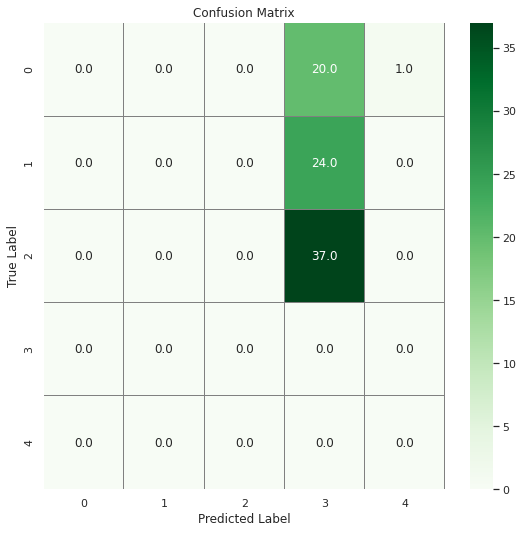

In [0]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### VGG16

In [0]:
model_VGG = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [0]:
x = preprocess_input(x_train)

preds = model_VGG.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03729826', 'matchstick', 0.4373177), ('n01930112', 'nematode', 0.2191947), ('n03196217', 'digital_clock', 0.077914186)]


In [0]:
model_VGG.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

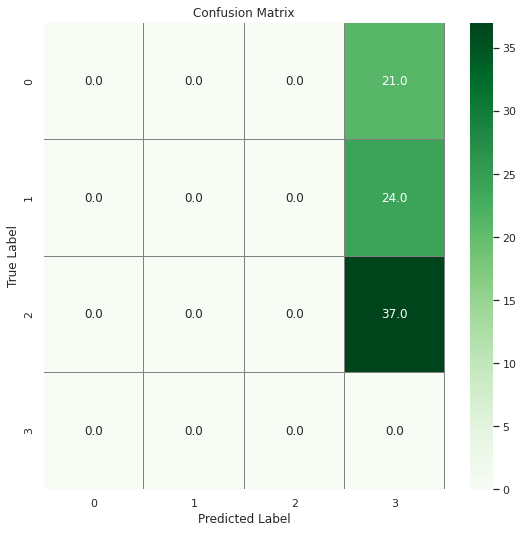

In [0]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model_VGG.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### VGG19

In [0]:
model_VGG19 = keras.applications.vgg19.VGG19(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [0]:
x = preprocess_input(x_train)

preds = model_VGG19.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03729826', 'matchstick', 0.71625406), ('n04286575', 'spotlight', 0.06995503), ('n03196217', 'digital_clock', 0.06723462)]


In [0]:
model_VGG19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

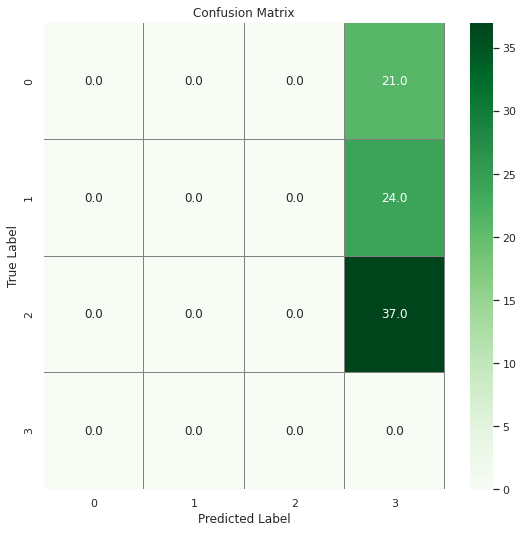

In [0]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model_VGG19.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### MobileNet

In [0]:
model_Mob = keras.applications.mobilenet.MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)
x = preprocess_input(x_train)

preds = model_Mob.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

17227776/17225924 [==============================] - 1s 0us/step
Predicted: [('n03530642', 'honeycomb', 0.3430959), ('n03347037', 'fire_screen', 0.2583107), ('n03637318', 'lampshade', 0.06720339)]


In [0]:
model_Mob.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

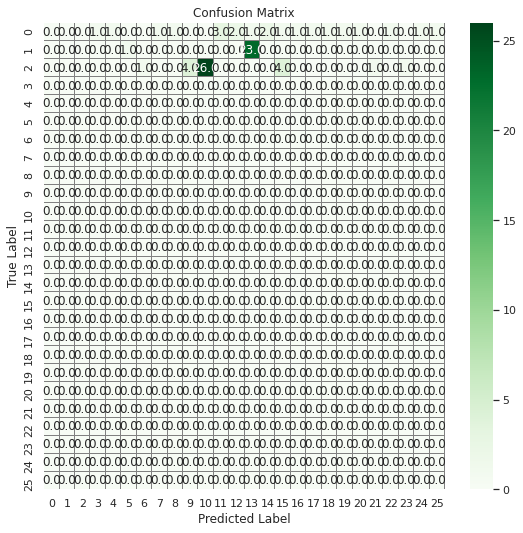

In [0]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model_Mob.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### DenseNet

In [0]:
model_Dense121 = keras.applications.densenet.DenseNet121(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
model_Dense169 = keras.applications.densenet.DenseNet169(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
model_Dense201 = keras.applications.densenet.DenseNet201(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

82526208/82524592 [==============================] - 2s 0us/step


In [0]:
x = preprocess_input(x_train)



preds = model_Dense121.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

preds = model_Dense169.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

preds = model_Dense201.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n04409515', 'tennis_ball', 1.0), ('n15075141', 'toilet_tissue', 0.0), ('n02319095', 'sea_urchin', 0.0)]
Predicted: [('n06874185', 'traffic_light', 1.0), ('n15075141', 'toilet_tissue', 0.0), ('n02391049', 'zebra', 0.0)]
Predicted: [('n04252225', 'snowplow', 1.0), ('n04228054', 'ski', 5.73519e-21), ('n15075141', 'toilet_tissue', 0.0)]


In [0]:
model_Dense121.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

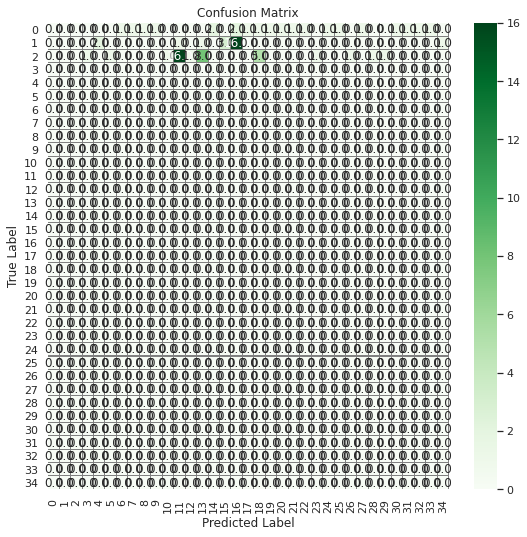

In [0]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model_Dense121.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [0]:
model_Dense169.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 230, 230, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [0]:
model_Dense201.summary()

Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_5 (ZeroPadding2D (None, 230, 230, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_5[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

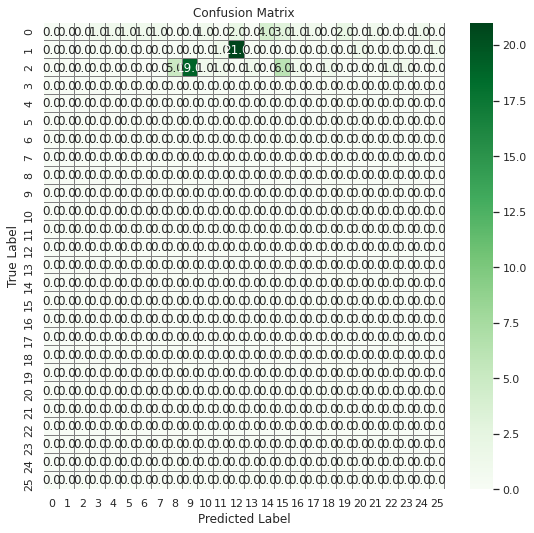

In [0]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model_Dense169.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

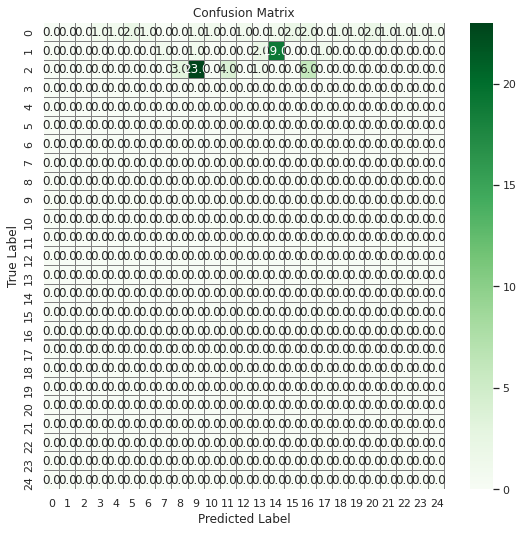

In [0]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model_Dense201.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### MobileNetV2

In [0]:
model_MobV2 = keras.applications.mobilenet_v2.MobileNetV2(input_shape=None, alpha=1.0, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

14540800/14536120 [==============================] - 1s 0us/step


In [0]:
model_MobV2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
x = preprocess_input(x_train)



preds = model_MobV2.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n04589890', 'window_screen', 0.12096279), ('n04201297', 'shoji', 0.09783897), ('n04590129', 'window_shade', 0.08922244)]


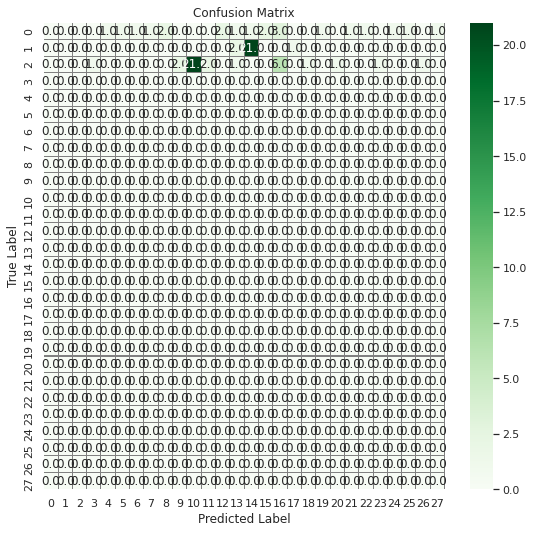

In [0]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model_MobV2.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()